In [1]:
! pip install torch

In [2]:
! pip install botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.0 MB/s eta 0:00:00


In [4]:
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood
import numpy as np

# Define synthetic or proxy objective for S/V ratio
def svr_function(params):
    rc, dp, ts, S, delta = params
    # Example simulated relationship (replace with your actual metric model)
    return (S / (rc * dp)) * np.exp(-ts * 2) * (1 + delta)

# Parameter bounds
bounds = torch.tensor([
    [0.5, 0.1, 0.02, 3, 0.05],   # lower bounds
    [3.0, 0.8, 0.3, 12, 0.5]     # upper bounds
], dtype=torch.double)

# Initial random samples
n_init = 30
train_x = torch.rand(n_init, 5, dtype=torch.double)
train_x = bounds[0] + (bounds[1] - bounds[0]) * train_x
train_y = torch.tensor([[svr_function(x.tolist())] for x in train_x])

for iteration in range(30):
    model = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    UCB = UpperConfidenceBound(model, beta=2.0)
    new_x, _ = optimize_acqf(UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=50)
    new_y = torch.tensor([[svr_function(new_x[0].tolist())]])

    train_x = torch.cat([train_x, new_x])
    train_y = torch.cat([train_y, new_y])

    print(f"Iter {iteration+1}: Best S/V = {train_y.max().item():.4f}")

best_idx = torch.argmax(train_y)
best_params = train_x[best_idx].tolist()
best_val = train_y[best_idx].item()

print("\n✅ Optimization complete!")
print("Best parameters:", best_params)
print("Best S/V ratio:", best_val)

/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 1: Best S/V = 198.8611


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 2: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 3: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 4: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 5: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 6: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 7: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 8: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 9: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 10: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 11: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 12: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 13: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 14: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 15: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 16: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 17: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 18: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 19: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 20: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 21: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 22: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 23: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 24: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 25: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 26: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 27: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 28: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 29: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 30: Best S/V = 345.8842

✅ Optimization complete!
Best parameters: [0.5, 0.1, 0.02, 12.0, 0.5]
Best S/V ratio: 345.88419809483634


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 1: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 2: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 3: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 4: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 5: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 6: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 7: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 8: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 9: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 10: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 11: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 12: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 13: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 14: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 15: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 16: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 17: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 18: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 19: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 20: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 21: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 22: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 23: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 24: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 25: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 26: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 27: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 28: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 29: Best S/V = 345.8842


/usr/local/lib/python3.12/dist-packages/botorch/models/utils/assorted.py:271: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


Iter 30: Best S/V = 345.8842

✅ Optimization complete!
Best parameters: {'rc': 0.5, 'dp': 0.1, 'ts': 0.02, 'S': 12.0, 'delta': 0.5}
Best S/V ratio: 345.88419809483634


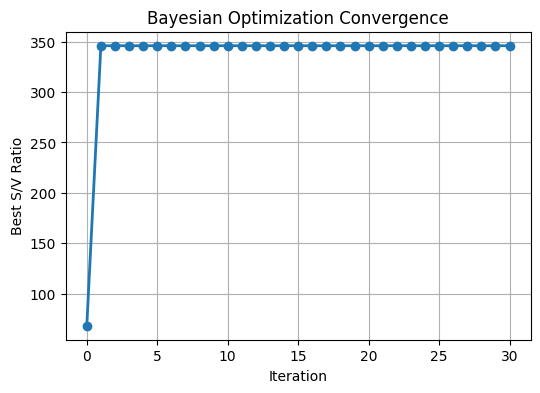

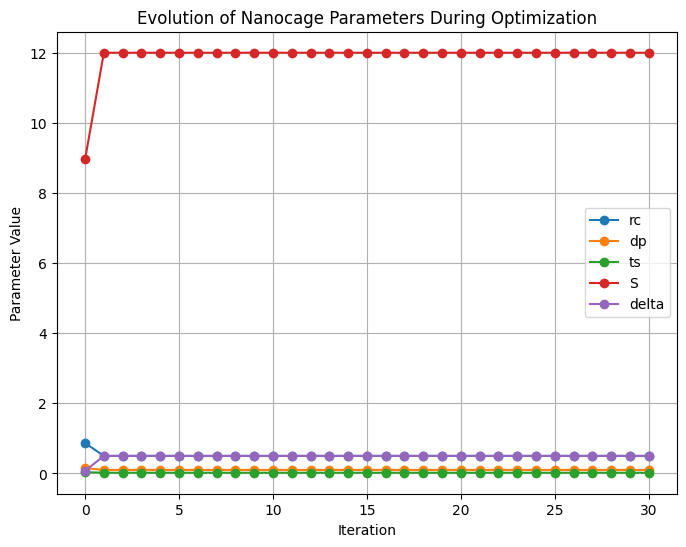

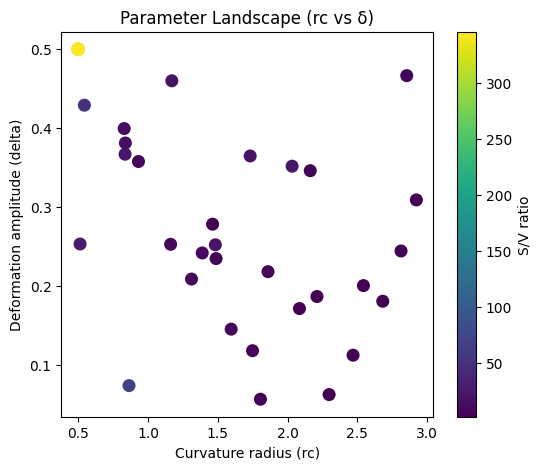

In [7]:
import matplotlib.pyplot as plt

def svr_function(params):
    rc, dp, ts, S, delta = params

    return (S / (rc * dp)) * np.exp(-ts * 2) * (1 + delta)


bounds = torch.tensor([
    [0.5, 0.1, 0.02, 3, 0.05],
    [3.0, 0.8, 0.3, 12, 0.5]
], dtype=torch.double)

param_labels = ["rc", "dp", "ts", "S", "delta"]



n_init = 30
train_x = torch.rand(n_init, 5, dtype=torch.double)
train_x = bounds[0] + (bounds[1] - bounds[0]) * train_x
train_y = torch.tensor([[svr_function(x.tolist())] for x in train_x])

# Store evolution
best_vals = [train_y.max().item()]
param_history = [train_x[torch.argmax(train_y)].numpy()]
for iteration in range(30):
    model = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    UCB = UpperConfidenceBound(model, beta=2.0)
    new_x, _ = optimize_acqf(UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=50)
    new_y = torch.tensor([[svr_function(new_x[0].tolist())]])

    train_x = torch.cat([train_x, new_x])
    train_y = torch.cat([train_y, new_y])

    best_vals.append(train_y.max().item())
    param_history.append(train_x[torch.argmax(train_y)].numpy())

    print(f"Iter {iteration+1}: Best S/V = {best_vals[-1]:.4f}")

best_idx = torch.argmax(train_y)
best_params = train_x[best_idx].tolist()
best_val = train_y[best_idx].item()

print("\n✅ Optimization complete!")
print("Best parameters:", dict(zip(param_labels, best_params)))
print("Best S/V ratio:", best_val)
param_history = np.array(param_history)

# 1️⃣ Convergence plot
plt.figure(figsize=(6, 4))
plt.plot(best_vals, marker='o', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Best S/V Ratio")
plt.title("Bayesian Optimization Convergence")
plt.grid(True)
plt.show()

# 2️⃣ Parameter evolution
plt.figure(figsize=(8, 6))
for i, label in enumerate(param_labels):
    plt.plot(param_history[:, i], label=label, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.title("Evolution of Nanocage Parameters During Optimization")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Optional: 2D projection (example of rc vs delta)
plt.figure(figsize=(6, 5))
plt.scatter(train_x[:, 0].numpy(), train_x[:, 4].numpy(),
            c=train_y.numpy().ravel(), cmap='viridis', s=70)
plt.colorbar(label="S/V ratio")
plt.xlabel("Curvature radius (rc)")
plt.ylabel("Deformation amplitude (delta)")
plt.title("Parameter Landscape (rc vs δ)")
plt.show()


